In [2]:
import pandas as pd

In [3]:
dataframe = pd.read_json('Digital_Music_5.json',lines=True)
dataframe.to_csv('reviews.csv', sep=',')

In [4]:
df = pd.read_csv("reviews.csv")

In [5]:
print(df.columns)
print(df.shape)

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')
(64706, 10)


In [121]:
df.describe()

,Unnamed: 0,overall,unixReviewTime
count,64706.000000,64706.000000,6.470600e+04
mean,32352.500000,4.222514,1.151117e+09
std,18679.157596,1.086081,1.279250e+08
min,0.000000,1.000000,8.937216e+08
25%,16176.250000,4.000000,1.056931e+09
50%,32352.500000,5.000000,1.128989e+09
75%,48528.750000,5.000000,1.245024e+09
max,64705.000000,5.000000,1.406074e+09


In [123]:
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,5555991584,"[3, 3]",5,"It's hard to believe ""Memory of Trees"" came ou...","09 12, 2006",A3EBHHCZO6V2A4,"Amaranth ""music fan""",Enya's last great album,1158019200
1,1,5555991584,"[0, 0]",5,"A clasically-styled and introverted album, Mem...","06 3, 2001",AZPWAXJG9OJXV,bethtexas,Enya at her most elegant,991526400
2,2,5555991584,"[2, 2]",5,I never thought Enya would reach the sublime h...,"07 14, 2003",A38IRL0X2T4DPF,bob turnley,The best so far,1058140800
3,3,5555991584,"[1, 1]",5,This is the third review of an irish album I w...,"05 3, 2000",A22IK3I6U76GX0,Calle,Ireland produces good music.,957312000
4,4,5555991584,"[1, 1]",4,"Enya, despite being a successful recording art...","01 17, 2008",A1AISPOIIHTHXX,"Cloud ""...""",4.5; music to dream to,1200528000


In [7]:
# add new features by grouping by product ID to see how popular the product is
count = df.groupby("asin", as_index=False).count()
mean = df.groupby("asin", as_index=False).mean()

# add the 'popular' features by merging (right join) the table
dfMerged = pd.merge(df, count, how='right', on=['asin'])
dfMerged

,Unnamed: 0_x,asin,helpful_x,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,Unnamed: 0_y,helpful_y,overall_y,reviewText_y,reviewTime_y,reviewerID_y,reviewerName_y,summary_y,unixReviewTime_y
0,0,5555991584,"[3, 3]",5,"It's hard to believe ""Memory of Trees"" came ou...","09 12, 2006",A3EBHHCZO6V2A4,"Amaranth ""music fan""",Enya's last great album,1158019200,23,23,23,23,23,23,23,23,23
1,1,5555991584,"[0, 0]",5,"A clasically-styled and introverted album, Mem...","06 3, 2001",AZPWAXJG9OJXV,bethtexas,Enya at her most elegant,991526400,23,23,23,23,23,23,23,23,23
2,2,5555991584,"[2, 2]",5,I never thought Enya would reach the sublime h...,"07 14, 2003",A38IRL0X2T4DPF,bob turnley,The best so far,1058140800,23,23,23,23,23,23,23,23,23
3,3,5555991584,"[1, 1]",5,This is the third review of an irish album I w...,"05 3, 2000",A22IK3I6U76GX0,Calle,Ireland produces good music.,957312000,23,23,23,23,23,23,23,23,23
4,4,5555991584,"[1, 1]",4,"Enya, despite being a successful recording art...","01 17, 2008",A1AISPOIIHTHXX,"Cloud ""...""",4.5; music to dream to,1200528000,23,23,23,23,23,23,23,23,23
5,5,5555991584,"[62, 65]",5,Who knows why I initially considered this to b...,"07 30, 2003",A2P49WD75WHAG5,Daniel J. Hamlow,Dreamy unearthly magic continues with Eire's o...,1059523200,23,23,23,23,23,23,23,23,23
6,6,5555991584,"[1, 5]",3,Enya is one of a few artists whom I consider s...,"05 27, 2000",A3O90G1D7I5EGG,dev1,Have You Hugged A Tree Today?,959385600,23,23,23,23,23,23,23,23,23
7,7,5555991584,"[5, 5]",5,Enya is one of of the most mysterious singers ...,"12 21, 2002",A3EJYJC25OJVKK,"Distant Voyageur ""Nicholas Computer""",The album for a romantic autumn evening,1040428800,23,23,23,23,23,23,23,23,23
8,8,5555991584,"[4, 4]",5,This is not another lousy Celtic New Age album...,"01 4, 2007",A1DA8VOH9NR6C7,E. Minkovitch,Simply wonderful.,1167868800,23,23,23,23,23,23,23,23,23
9,9,5555991584,"[12, 12]",5,"Many times, AND WITH GOOD REASON, the ""new age...","05 12, 2003",A33TRNCQK4IUO7,guillermoj,"A true gem, even if you don't love conventiona...",1052697600,23,23,23,23,23,23,23,23,23


In [8]:
#rename column
dfMerged["totalReviewers"] = dfMerged["reviewerID_y"]
dfMerged["overallScore"] = dfMerged["overall_x"]
dfMerged["summaryReview"] = dfMerged["summary_x"]

dfNew = dfMerged[['asin','summaryReview','overallScore',"totalReviewers"]]

In [87]:
dfMerged = dfMerged.sort_values(by='totalReviewers', ascending=False)
# keep the products with more than 20 reviews
dfCount = dfMerged[dfMerged.totalReviewers >= 20]
dfCount

,Unnamed: 0_x,asin,helpful_x,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,...,overall_y,reviewText_y,reviewTime_y,reviewerID_y,reviewerName_y,summary_y,unixReviewTime_y,totalReviewers,overallScore,summaryReview
48752,48752,B0007NFL18,"[4, 9]",5,"Dont be misguided by the low stars, because 95...","08 15, 2005",A2KPVBROV25H5B,Wise Guy,Dont be fooled by the stars!,1124064000,...,272,272,272,272,272,272,272,272,5,Dont be fooled by the stars!
48703,48703,B0007NFL18,"[1, 5]",5,awesome cd with great production. has tracks p...,"03 11, 2005",AZY3MDFJJFI91,R. Pool,really really good cd,1110499200,...,272,272,272,272,272,272,272,272,5,really really good cd
48705,48705,B0007NFL18,"[0, 0]",1,WTF? How do you come out with a sophomore alb...,"04 12, 2005",A5WGG7K5KR29O,"R. Williams ""RaShidah!""","Negative, Negative, Negative",1113264000,...,272,272,272,272,272,272,272,272,1,"Negative, Negative, Negative"
48706,48706,B0007NFL18,"[1, 2]",3,Everyone was talking about this album prior to...,"03 6, 2005",A5ZPFOTZAB1ID,"ryan ""King""",Don't Believe the Hype,1110067200,...,272,272,272,272,272,272,272,272,3,Don't Believe the Hype
48707,48707,B0007NFL18,"[3, 4]",3,It could have stayed at a five but he didnt w...,"04 22, 2006",A3BXHLWJMQLHLD,"S.C. ""Jacinto Morales""",The First couple weeks it was like str8 5,1145664000,...,272,272,272,272,272,272,272,272,3,The First couple weeks it was like str8 5
48708,48708,B0007NFL18,"[12, 14]",3,"Aside from a couple of shining moments, you're...","03 3, 2005",A1NDMIBMK5R2KG,Scott D. Gribble,This will sell regardless of how uneven the Ma...,1109808000,...,272,272,272,272,272,272,272,272,3,This will sell regardless of how uneven the Ma...
48704,48704,B0007NFL18,"[1, 5]",5,Why are you still reading? I just told you to...,"03 4, 2005",A1XOXFOTE4O77G,ruserious,Krayzie Bone - Gemini: Good vs. Evil - Buy it ...,1109894400,...,272,272,272,272,272,272,272,272,5,Krayzie Bone - Gemini: Good vs. Evil - Buy it ...
48560,48560,B0007NFL18,"[7, 17]",5,"Hi. I listened to this CD, yo, and it is whatz...","02 13, 2006",AKLYH2CI11XJN,D. N Voetberg,"50 Cent should get 49 or 50 stars, not just 5!",1139788800,...,272,272,272,272,272,272,272,272,5,"50 Cent should get 49 or 50 stars, not just 5!"
48701,48701,B0007NFL18,"[1, 7]",2,I have a review for the regular massacre cdOut...,"09 25, 2005",A2POZM26QJ8FJ1,rip pacman,hmmm,1127606400,...,272,272,272,272,272,272,272,272,2,hmmm
48739,48739,B0007NFL18,"[2, 3]",4,This album is a lot better than a lot of revie...,"06 7, 2005",A10Y1BZ88EJO63,"Thomas Bryant Law ""Orpheous""","HATE IT OR LOVE IT...EHH, NEITHER",1118102400,...,272,272,272,272,272,272,272,272,4,"HATE IT OR LOVE IT...EHH, NEITHER"


In [88]:
# calculate the average 'star'(overall) by grouping by product ID and then use mean()
dfProductReview = df.groupby("asin", as_index=False).mean()
ProductReviewSummary = dfCount.groupby("asin")["summaryReview"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)
ProductReviewSummary.to_csv("ProductReviewSummary.csv")

In [124]:
dfProductReview.head()

,asin,Unnamed: 0,overall,unixReviewTime
0,5555991584,11.0,4.739130,1.099834e+09
1,B0000000ZW,30.0,4.133333,1.122566e+09
2,B00000016T,61.0,4.851064,1.156550e+09
3,B00000016W,152.0,4.629630,1.112818e+09
4,B00000017R,229.5,4.650000,1.131127e+09


In [90]:
df3 = pd.read_csv("ProductReviewSummary.csv")
df3 = pd.merge(df3, dfProductReview, on="asin", how='inner')

In [125]:
# subset the new table with Product ID, summary review(for NLP) and average overall
df3 = df3[['asin','summaryReview','overall']]
df3.head()

,asin,summaryReview,overall
0,B00000016T,"['Great New Wave album, sounding good', 'all t...",4.851064
1,B000000518,"[""Age Ain't Nothing But a Number"", ""Age ain't ...",4.322581
2,B00000053Q,"['Dirty South Riders', 'Great album!', 'Heavy ...",4.913043
3,B00000053X,"['The album that started the boy band trend', ...",3.838710
4,B00000055E,['we will always remember PAC!!!! but whats go...,4.268293


In [92]:
# clean the reviews by Regular expression
import re
regEx = re.compile('[^a-z]+')

# lowercase, strip
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

In [126]:
#reset index and drop duplicate rows
df3["summaryClean"] = df3["summaryReview"].apply(cleanReviews)
df3 = df3.drop_duplicates(['overall'], keep='last')
df3 = df3.reset_index()

In [202]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from pandas import DataFrame 
reviews = df3["summaryClean"] 
countVector = CountVectorizer(max_features = 500, stop_words='english') 
transformedReviews = countVector.fit_transform(reviews) 

dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names())
dfReviews = dfReviews.astype(int)

In [203]:
#save 
dfReviews.to_csv("dfReviews.csv")

In [204]:
dfReviews.head()

,absolutely,actually,aerosmith,age,ain,air,alanis,album,albums,alicia,...,worthy,wow,wrong,wu,ya,yeah,year,years,yes,young
0,0,0,0,0,0,0,0,10,2,0,...,0,0,1,0,0,1,0,1,0,0
1,0,0,0,4,4,0,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,3,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,4,0,0,...,0,2,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,5,2,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:

# First let's create a dataset called X
import numpy as np
X = np.array(dfReviews)
 # create train and test
tpercent = 0.8
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [206]:
# KNN classifier to find similar products
print(lentrain)
print(lentest)

495
124


In [207]:
from sklearn.neighbors import NearestNeighbors
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [208]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B000NVIXFK  average rating is  4.222222222222222
The first similar product is  B000002IWQ  average rating is  4.030769230769231
The second similar product is  B000002JAI  average rating is  3.641509433962264
-----------------------------------------------------------
Based on product reviews, for  B000O5AYC0  average rating is  4.260869565217392
The first similar product is  B00097A5HW  average rating is  4.0606060606060606
The second similar product is  B00064LOQO  average rating is  2.7096774193548385
-----------------------------------------------------------
Based on product reviews, for  B000OQF6N6  average rating is  3.4038461538461537
The first similar product is  B0001XAMC2  average rating is  3.3043478260869565
The second similar product is  B0006HC0OQ  average rating is  3.7037037037037037
-----------------------------------------------------------
Based on product reviews, for  B000OYC3J8  average rating is  3.9649122807017543
The first similar

The first similar product is  B00002067T  average rating is  4.65
The second similar product is  B0009XFIZK  average rating is  4.0476190476190474
-----------------------------------------------------------
Based on product reviews, for  B004UBB3KQ  average rating is  4.173913043478261
The first similar product is  B00002067T  average rating is  4.65
The second similar product is  B000005RHR  average rating is  4.45
-----------------------------------------------------------
Based on product reviews, for  B004XE0P5E  average rating is  3.891891891891892
The first similar product is  B000040OVH  average rating is  4.230769230769231
The second similar product is  B000FUF86Q  average rating is  4.166666666666667
-----------------------------------------------------------
Based on product reviews, for  B005ELQVGW  average rating is  3.6956521739130435
The first similar product is  B00022KF1A  average rating is  4.05
The second similar product is  B00006LV77  average rating is  3.85
-------

In [210]:
from sklearn import neighbors
from sklearn.metrics import classification_report
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          2       0.00      0.00      0.00         2
          3       0.61      0.30      0.40        47
          4       0.66      0.88      0.75        75

avg / total       0.63      0.65      0.61       124



In [211]:
from sklearn.metrics import accuracy_score
print (accuracy_score(df5_test_target, knnpreds_test))

0.6451612903225806


In [212]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 4
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          2       0.00      0.00      0.00         2
          3       0.67      0.34      0.45        47
          4       0.68      0.89      0.77        75

avg / total       0.66      0.67      0.64       124



In [213]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.6693548387096774


In [214]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.85
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [215]:
# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [216]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B001CJOHG6  average rating is  4.129032258064516
The first similar product is  B0002CHI4C  average rating is  4.434782608695652
The second similar product is  B000003TA0  average rating is  4.590909090909091
-----------------------------------------------------------
Based on product reviews, for  B001CY2EL6  average rating is  3.9545454545454546
The first similar product is  B000T0C0MC  average rating is  4.095238095238095
The second similar product is  B0009XFIZK  average rating is  4.0476190476190474
-----------------------------------------------------------
Based on product reviews, for  B001EOQTSI  average rating is  3.8461538461538463
The first similar product is  B00008AY6B  average rating is  4.136363636363637
The second similar product is  B00022KF1A  average rating is  4.05
-----------------------------------------------------------
Based on product reviews, for  B001EYGOEM  average rating is  4.025
The first similar product is  B00022KF1A  ave

In [217]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

[4 3 4 4 3 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 3
 4 3 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4]
             precision    recall  f1-score   support

          2       0.00      0.00      0.00         2
          3       0.50      0.16      0.24        32
          4       0.67      0.95      0.79        59

avg / total       0.60      0.66      0.58        93



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [218]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.6559139784946236


In [219]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='brute').fit(dfReviews_train)

distances, indices = neighbor.kneighbors(dfReviews_train)

In [220]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))


             precision    recall  f1-score   support

          2       0.00      0.00      0.00         2
          3       0.78      0.22      0.34        32
          4       0.68      0.97      0.80        59

avg / total       0.70      0.69      0.62        93

Accuracy:  0.6881720430107527


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [221]:
neighbor = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(dfReviews_train)
distances, indices = neighbor.kneighbors(dfReviews_train)

In [222]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))


             precision    recall  f1-score   support

          2       0.00      0.00      0.00         2
          3       0.50      0.16      0.24        32
          4       0.67      0.95      0.79        59

avg / total       0.60      0.66      0.58        93

Accuracy:  0.6559139784946236


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [223]:
cluster = df.groupby("overall")["summary"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["summaryClean"] = cluster1["summary"].apply(cleanReviews)

In [224]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

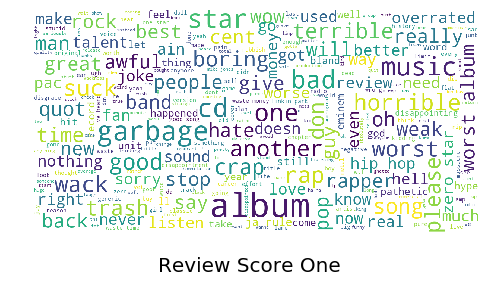

In [225]:
import matplotlib.pyplot as plt
show_wordcloud(cluster1["summaryClean"][0], title = "Review Score One")

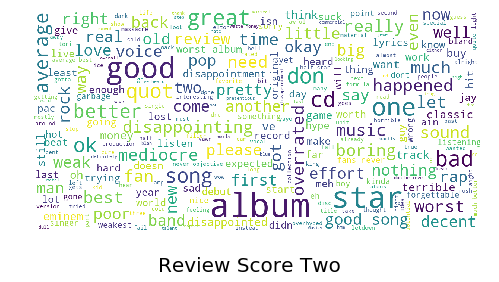

In [226]:
show_wordcloud(cluster1["summaryClean"][1] , title = "Review Score Two")

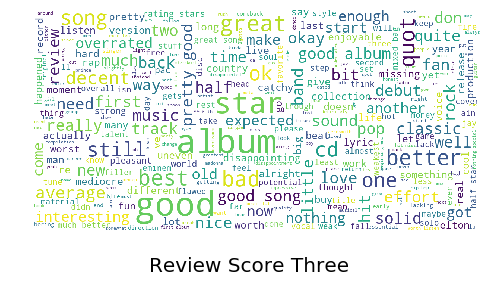

In [227]:
show_wordcloud(cluster1["summaryClean"][2], title = "Review Score Three")

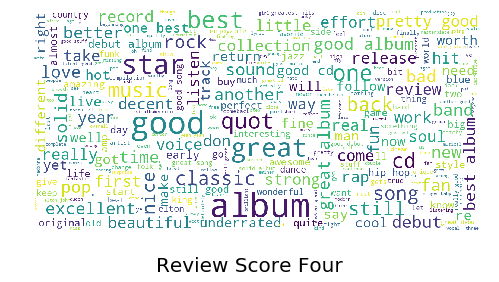

In [228]:
show_wordcloud(cluster1["summaryClean"][3], title = "Review Score Four")

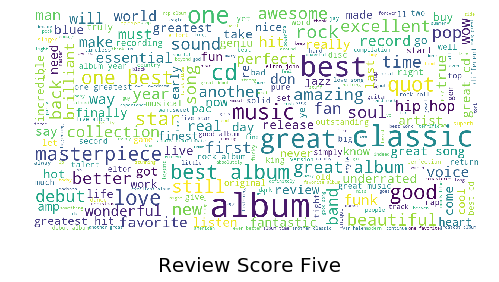

In [229]:
show_wordcloud(cluster1["summaryClean"][4], title = "Review Score Five")